# Visualização de Dados com *Colaboratory*

---



## 1: Introdução

---



O *Google Colaboratory*, ou *Colab*, é uma implementação do [Jupyter Notebook](https://jupyter.org/) que possibilita a programação em nuvem na linguagem de programação [Python](https://www.python.org/), sendo utilizado no mundo todo principalmente para *Data Science* e *Machine Learning*.

O objetivo desse *Notebook* é mostrar de maneira clara e didática de como programar no *Colab*, importar, gerenciar e visualizar dados.

## 2: Importando os Dados

---



No caso desse *notebook* os dados estam armazenados em um [repositório do github](https://github.com/cassiofb-dev/bcc).

Sabendo o *link* do dado será feito:

1.   Importação das ferramentas nescessárias
2.   Armazenar o *link* em uma *string*
3.   Utilizala como o caminho para um *DataFrame* do *Pandas*
4.   *Download* para o *runtime* em nuvem do *Colab*

In [1]:
import matplotlib.pyplot as plt   # Visualização de dados
import seaborn as sns             # Visualização de dados (baseado no matplotlib)
import pandas as pd               # Gerenciamento dos dados
import numpy as np                # Utilidades matemáticas

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
link_dados = 'https://github.com/cassiofb-dev/bcc/blob/master/outros/reprovados/reprovados.xlsx?raw=true'
dados = pd.read_excel(link_dados,sheet_name=None)

Após armazenar a planilha no *DataFrame* dados, eles podem ser visualizados e gerenciados.

Na próxima célula será feita a visualização da planilha.

In [67]:
for chave in dados:
  print(dados[chave].head())

           CAMPUS   ANO      PERÍODO            SITUAÇÃO FINAL  QUANTIDADE
0  ANGRA DOS REIS  2018  2° SEMESTRE                 REPROVADO         422
1  ANGRA DOS REIS  2018  2° SEMESTRE  REPROVADO POR FREQUÊNCIA         143
2  ANGRA DOS REIS  2019  1° SEMESTRE                 REPROVADO         451
3  ANGRA DOS REIS  2019  1° SEMESTRE  REPROVADO POR FREQUÊNCIA         188
4         ITAGUAÍ  2018  2° SEMESTRE                 REPROVADO         471
           CAMPUS PERÍODO COD_CURSO  ... REP RF RSN
0  ANGRA DOS REIS  2018/2    GMECAR  ...  11  9   0
1  ANGRA DOS REIS  2018/2    GMECAR  ...   6  4   0
2  ANGRA DOS REIS  2018/2    GMECAR  ...  14  9   0
3  ANGRA DOS REIS  2018/2    GMECAR  ...   4  3   0
4  ANGRA DOS REIS  2018/2    GMECAR  ...   4  0   0

[5 rows x 9 columns]
           CAMPUS PERÍODO COD_CURSO  ... REP RF RSN
0  ANGRA DOS REIS  2019/1    GMECAR  ...   3  1   0
1  ANGRA DOS REIS  2019/1    GMECAR  ...   2  1   0
2  ANGRA DOS REIS  2019/1    GMECAR  ...   3  3   0
3  ANGRA

Observando os dados nota-se que não se trata de um *DataFrame*, mas sim um dicionário. Agora deverá ser feito o gerenciamento desses dados.

## 3: Gerenciando os Dados

---



Após importar os dados da planilha e armazena-los em um dicionário, devemos separar eles pelas suas respectivas classificações.

É facil notar que só há duas classificações após a verificação acima, 'TABELA' e páginas de 1 a 22. Logo iremos separar os dados em duas variáveis, tabela geral e tabela específica.

Essa separação pode ser simplesmente feita com um *loop*

In [4]:
tabela_geral = pd.DataFrame()
tabela_curso = pd.DataFrame()

for chave in dados:
  if chave == 'TABELA':
    tabela_geral = dados[chave]
  else:
    tabela_curso = tabela_curso.append(dados[chave])

Após transformar esse dicionário em dois *DataFrames* podemos visualizar novamente para ter certeza que tudo ocorreu conforme planejado.

In [5]:
tabela_geral.head()

,CAMPUS,ANO,PERÍODO,SITUAÇÃO FINAL,QUANTIDADE
0,ANGRA DOS REIS,2018,2° SEMESTRE,REPROVADO,422
1,ANGRA DOS REIS,2018,2° SEMESTRE,REPROVADO POR FREQUÊNCIA,143
2,ANGRA DOS REIS,2019,1° SEMESTRE,REPROVADO,451
3,ANGRA DOS REIS,2019,1° SEMESTRE,REPROVADO POR FREQUÊNCIA,188
4,ITAGUAÍ,2018,2° SEMESTRE,REPROVADO,471


Tudo certo na tabela geral. Mas para completa certeza, vamos ver mais ao fundo suas propriedades.

In [6]:
tabela_geral.isna().sum()

CAMPUS            0
ANO               0
PERÍODO           0
SITUAÇÃO FINAL    0
QUANTIDADE        0
dtype: int64

A linha de código acima verifica se houve alguma lacuna nos dados. Podemos ver que houve 0 lacunas, logo podemos seguir adiante.

In [7]:
tabela_curso.head()

,CAMPUS,PERÍODO,COD_CURSO,NOME_CURSO,COD_DISCIPLINA,NOME_DISCIPLINA,REP,RF,RSN
0,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1102,ÁLGEBRA LINEAR I,11,9,0
1,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1209,ÁLGEBRA LINEAR II,6,4,0
2,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1101,CÁLCULO DIFERENCIAL E INTEGRAL I,14,9,0
3,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1201,CÁLCULO DIFERENCIAL E INTEGRAL II,4,3,0
4,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1303,CÁLCULO NUMÉRICO,4,0,0


Aparentemente tudo está certo para esse *DataFrame* porém vamos repetir o mesmo procedimento anterior.

In [8]:
tabela_curso.isna().sum()

CAMPUS             0
PERÍODO            0
COD_CURSO          0
NOME_CURSO         0
COD_DISCIPLINA     0
NOME_DISCIPLINA    0
REP                0
RF                 1
RSN                0
dtype: int64

Verificando mais profundamente podemos notar que há apenas uma lacuna. Vamos focar nela.

In [9]:
for i in range(len(tabela_curso['RF'])):
  if tabela_curso.iloc[i].isna().sum() > 0:
    print(tabela_curso.iloc[i])
    break

CAMPUS                            VALENÇA
PERÍODO                            2018/2
COD_CURSO                           ADMVL
NOME_CURSO         CURSO DE ADMINISTRAÇÃO
COD_DISCIPLINA                 GADMVA7420
NOME_DISCIPLINA      GESTÃO DA PRODUÇÃO I
REP                                     2
RF                                    NaN
RSN                                     0
Name: 90, dtype: object


O erro está no campo de Velença, vamos conferir a tabela geral para verificar se houve 0 reprovados.

In [10]:
reprovados_geral = tabela_geral.QUANTIDADE.sum()
print(reprovados_geral)

15160


In [11]:
reprovados_curso = tabela_curso['REP'].sum() + tabela_curso['RF'].sum() + tabela_curso['RSN'].sum()
print(reprovados_curso)

TypeError: ignored

Tentando resolver um error, descubrimos outros erros nos dados. Aparentemente na quantitade de reprovados alguem colocou uma letra por engano. Infelizmente isso estragou todos os nossos dados, mas vamos ver se é possível recuperar.

In [12]:
tabela_curso.dtypes

CAMPUS             object
PERÍODO            object
COD_CURSO          object
NOME_CURSO         object
COD_DISCIPLINA     object
NOME_DISCIPLINA    object
REP                 int64
RF                 object
RSN                object
dtype: object

As colunas 'RF' e 'RSN' contém os erros. Vamos criar uma tabela corrigida, tendo cuidado ao preservar a original.

In [13]:
tabela_curso_corrigida = tabela_curso.copy()
tabela_curso_corrigida.RF = pd.to_numeric(tabela_curso_corrigida.RF, errors='coerce').fillna(0)
tabela_curso_corrigida.RSN = pd.to_numeric(tabela_curso_corrigida.RSN, errors='coerce').fillna(0)

Aparentemente a conversão ocorreu bem.

In [14]:
tabela_curso_corrigida.isna().sum()

CAMPUS             0
PERÍODO            0
COD_CURSO          0
NOME_CURSO         0
COD_DISCIPLINA     0
NOME_DISCIPLINA    0
REP                0
RF                 0
RSN                0
dtype: int64

Agora podemos ver se a soma dos reprovados são iguais.

In [15]:
reprovados_curso = tabela_curso_corrigida['REP'].sum() + tabela_curso_corrigida['RF'].sum() + tabela_curso_corrigida['RSN'].sum()
print(reprovados_curso)

15133.0


In [16]:
print(reprovados_geral - reprovados_curso)

27.0


Fazendo a diferença percebe-se que há um erro de 27 alunos entre as tabelas devido as 3 colunas não serem preenchidas corretamente. Então para minimizar o erro iremos preencher os valores sem entrada com a média de suas respectivas colunas.

In [17]:
tabela_curso_corrigida = tabela_curso.copy()
tabela_curso_corrigida.RF = pd.to_numeric(tabela_curso_corrigida.RF, errors='coerce').fillna(method='bfill')
tabela_curso_corrigida.RSN = pd.to_numeric(tabela_curso_corrigida.RSN, errors='coerce').fillna(method='bfill')

reprovados_curso = tabela_curso_corrigida['REP'].sum() + tabela_curso_corrigida['RF'].sum() + tabela_curso_corrigida['RSN'].sum()
erro = reprovados_geral - reprovados_curso
print('Erro entre tabelas: {} = {:.4f}%'.format(erro,erro/reprovados_geral*100,))

Erro entre tabelas: 13.0 = 0.0858%


Apesar de ainda possuir diferença, esse é o máximo que podemos mitigar os erros do preenchimento dos dados. O próximo passo será a visualização desses dados.

## 4: Visualizando os Dados

---



Agora que verificamos que não há erros na tabela geral e a tabela curso foi corrigida na medida do possível, podemos visualizar os dados para possibilitar sua interpretação.

Vamos organizar os dados para gerar os gráficos.

In [18]:
tabela_geral_multi = tabela_geral.groupby(['CAMPUS', 'ANO', 'PERÍODO', 'SITUAÇÃO FINAL']).QUANTIDADE.apply(sorted)

In [19]:
tabela_geral_multi.head()

CAMPUS          ANO   PERÍODO      SITUAÇÃO FINAL          
ANGRA DOS REIS  2018  2° SEMESTRE  REPROVADO                   [422]
                                   REPROVADO POR FREQUÊNCIA    [143]
                2019  1° SEMESTRE  REPROVADO                   [451]
                                   REPROVADO POR FREQUÊNCIA    [188]
ITAGUAÍ         2018  2° SEMESTRE  REPROVADO                   [471]
Name: QUANTIDADE, dtype: object

Agora sim esses dados tão ficando bonitos! Próximo passo é a visualização.

In [64]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) # Estilo do gráfico

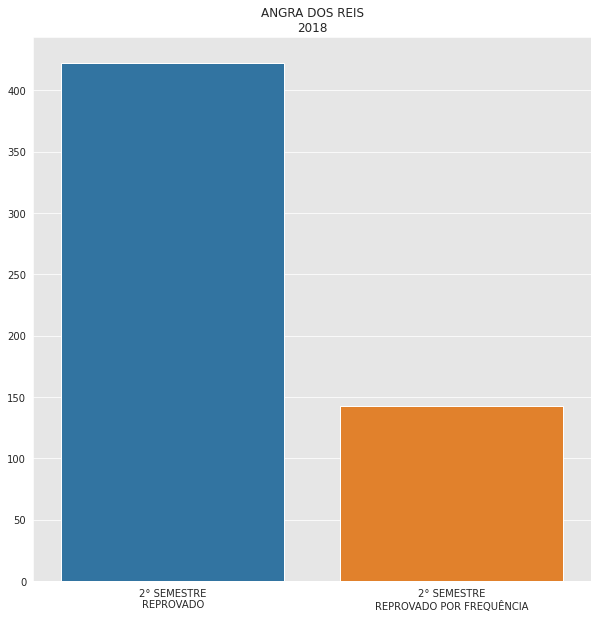

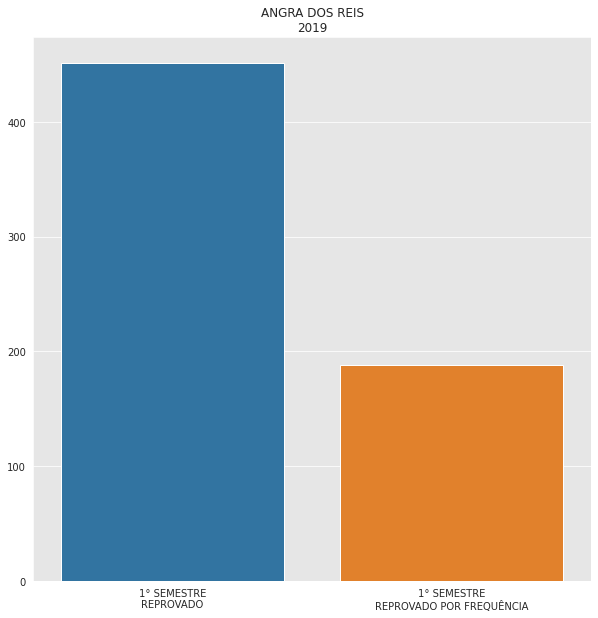

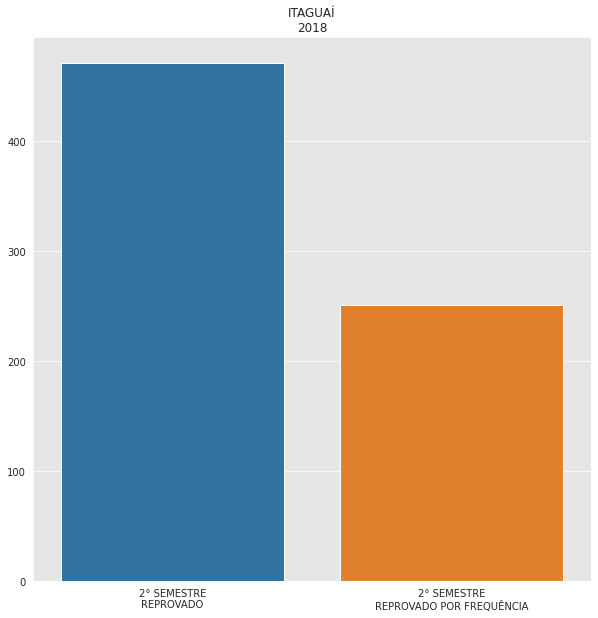

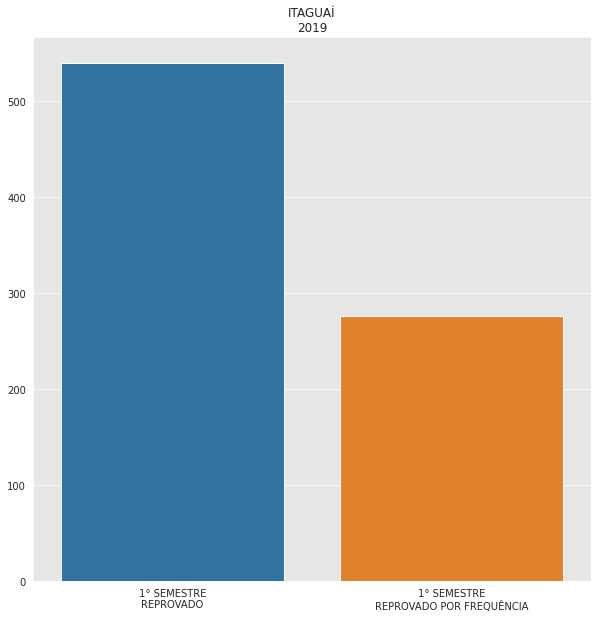

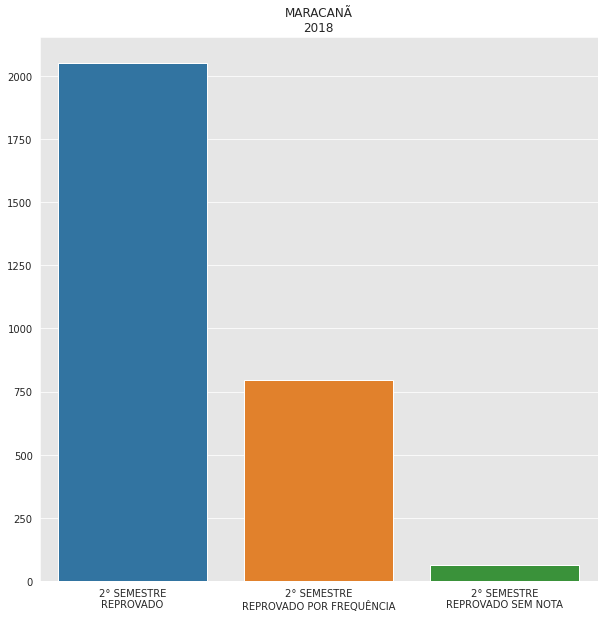

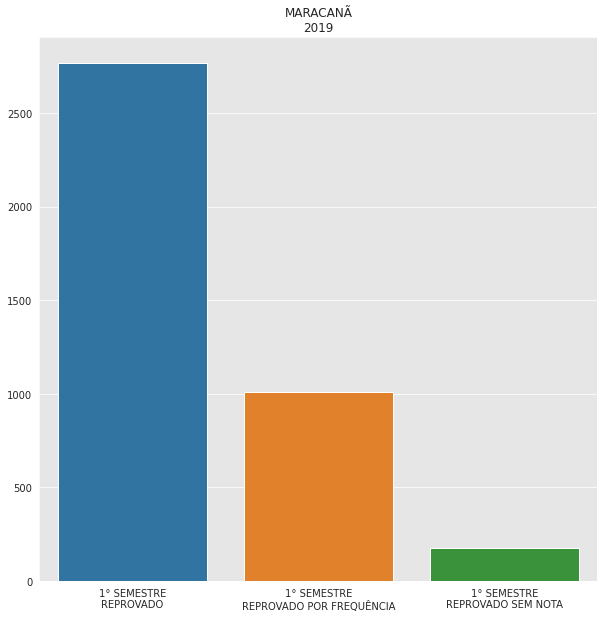

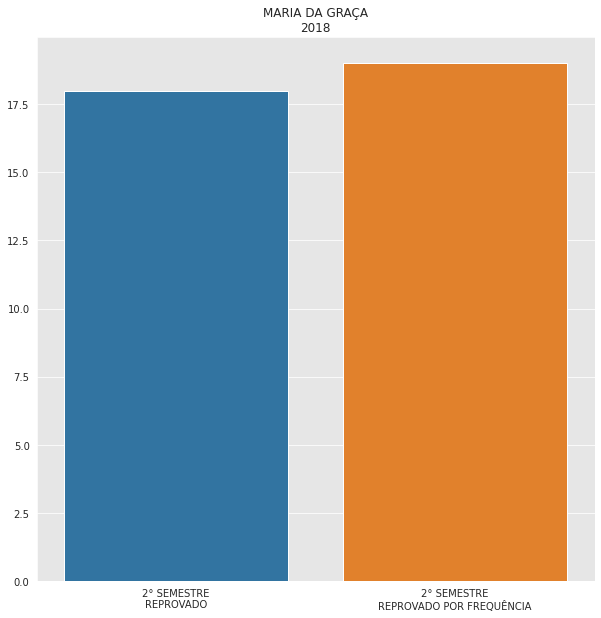

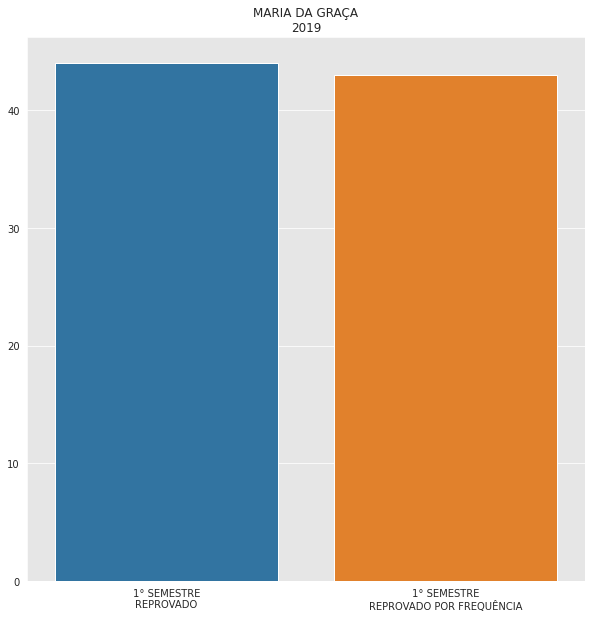

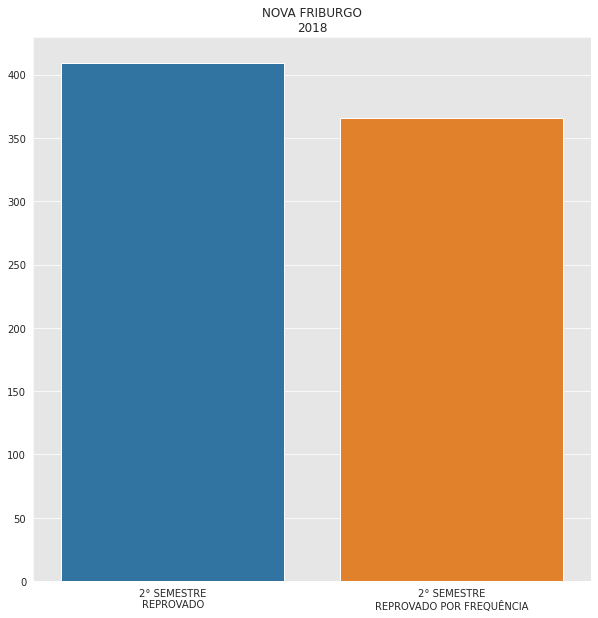

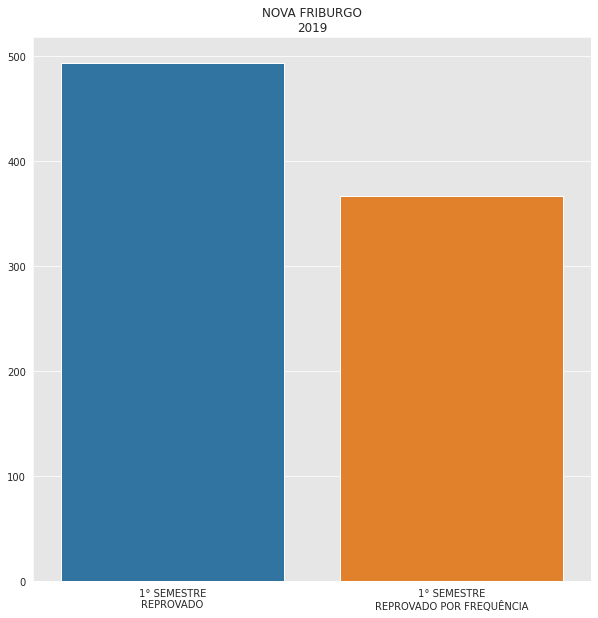

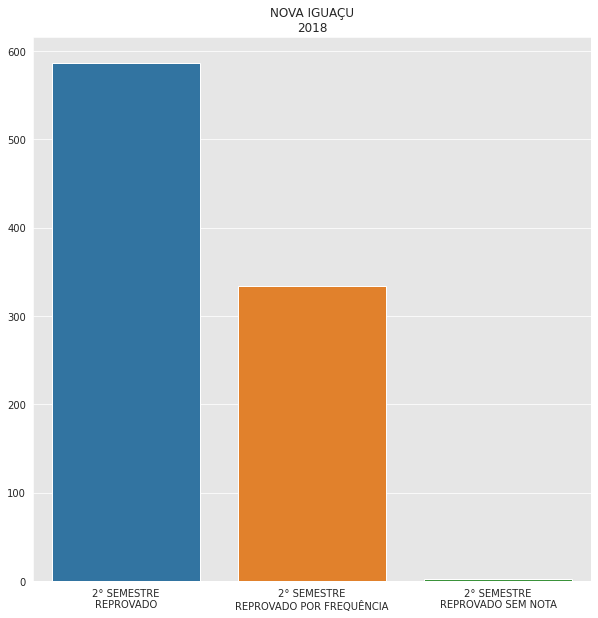

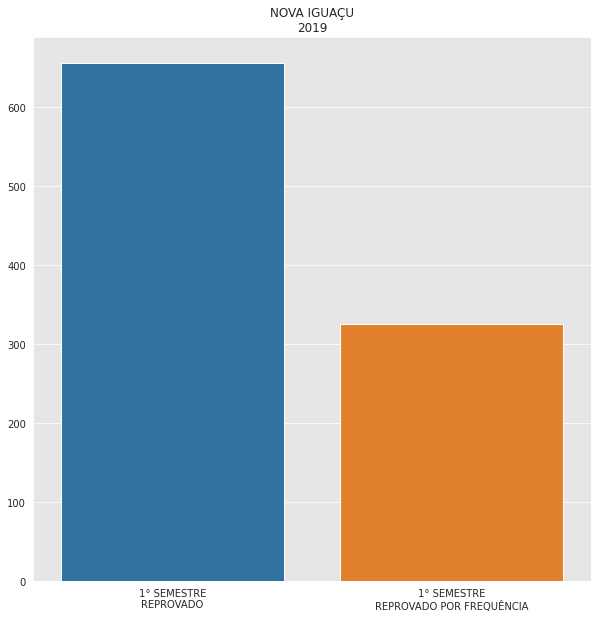

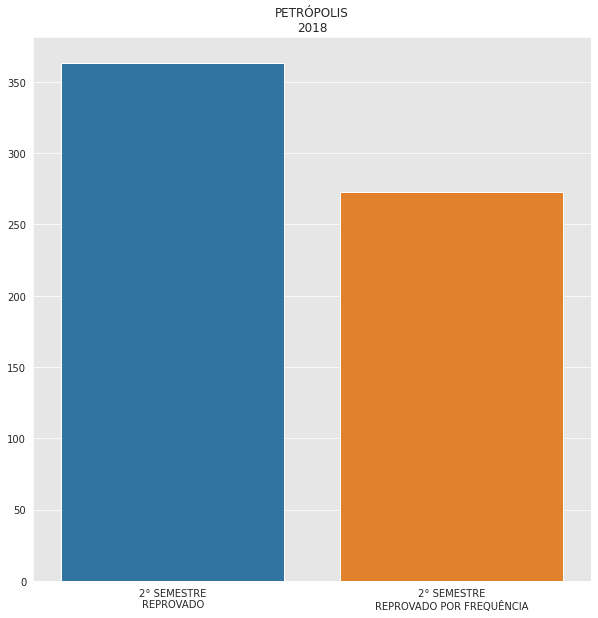

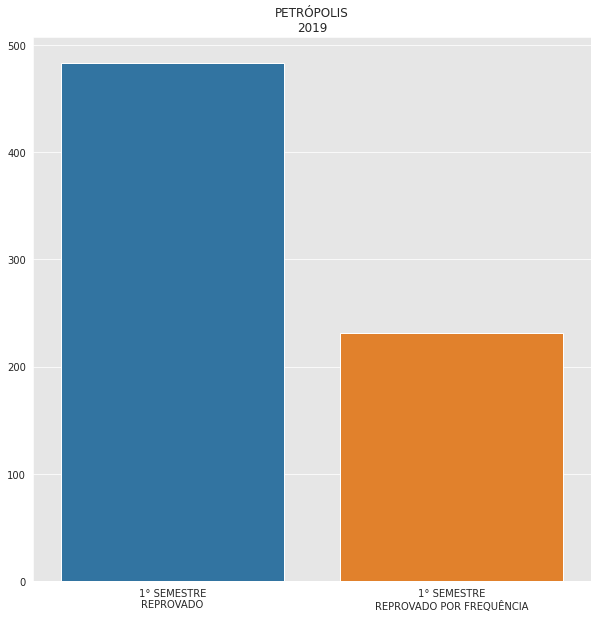

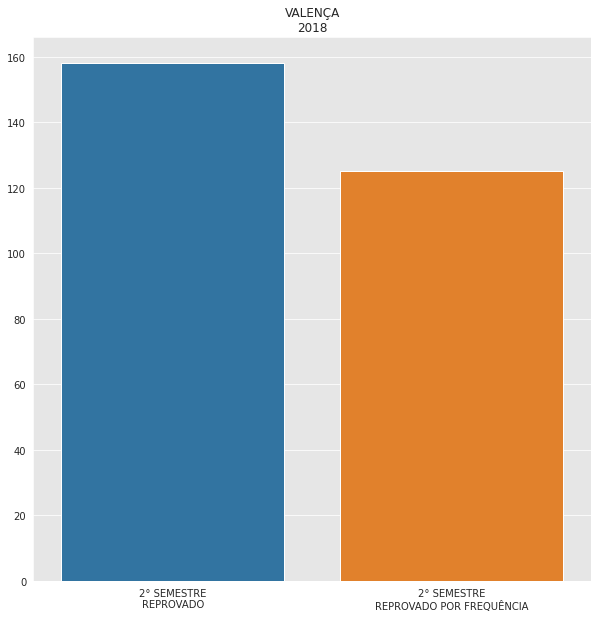

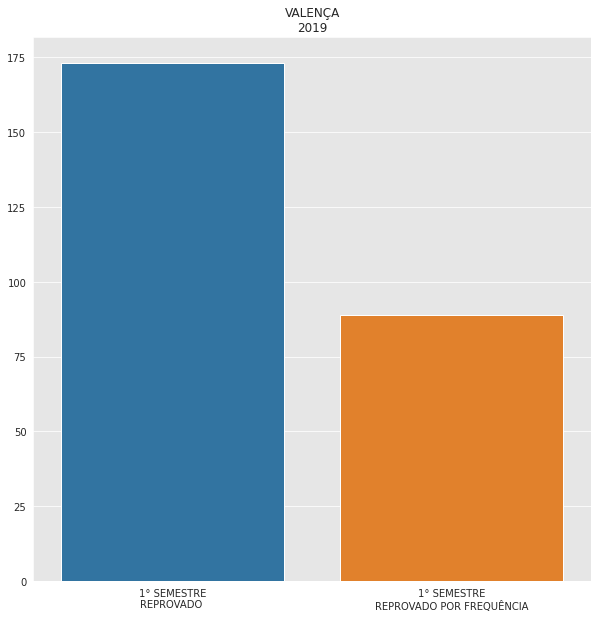

In [65]:
for i in tabela_geral_multi.index.get_level_values(0).unique():
  for j in tabela_geral_multi[i].index.get_level_values(0).unique():
    tps = tabela_geral_multi[i, j].index.to_list()
    x = ['{}\n{}'.format(a,b) for a, b in tps]
    y = [a[0] for a in tabela_geral_multi[i, j].to_list()]
    plt.figure(figsize=(10,10))
    sns.barplot(x,y)
    plt.title('{}\n{}'.format(i,j))

Podemos fazer um gráfico maior para comparar as unidades.

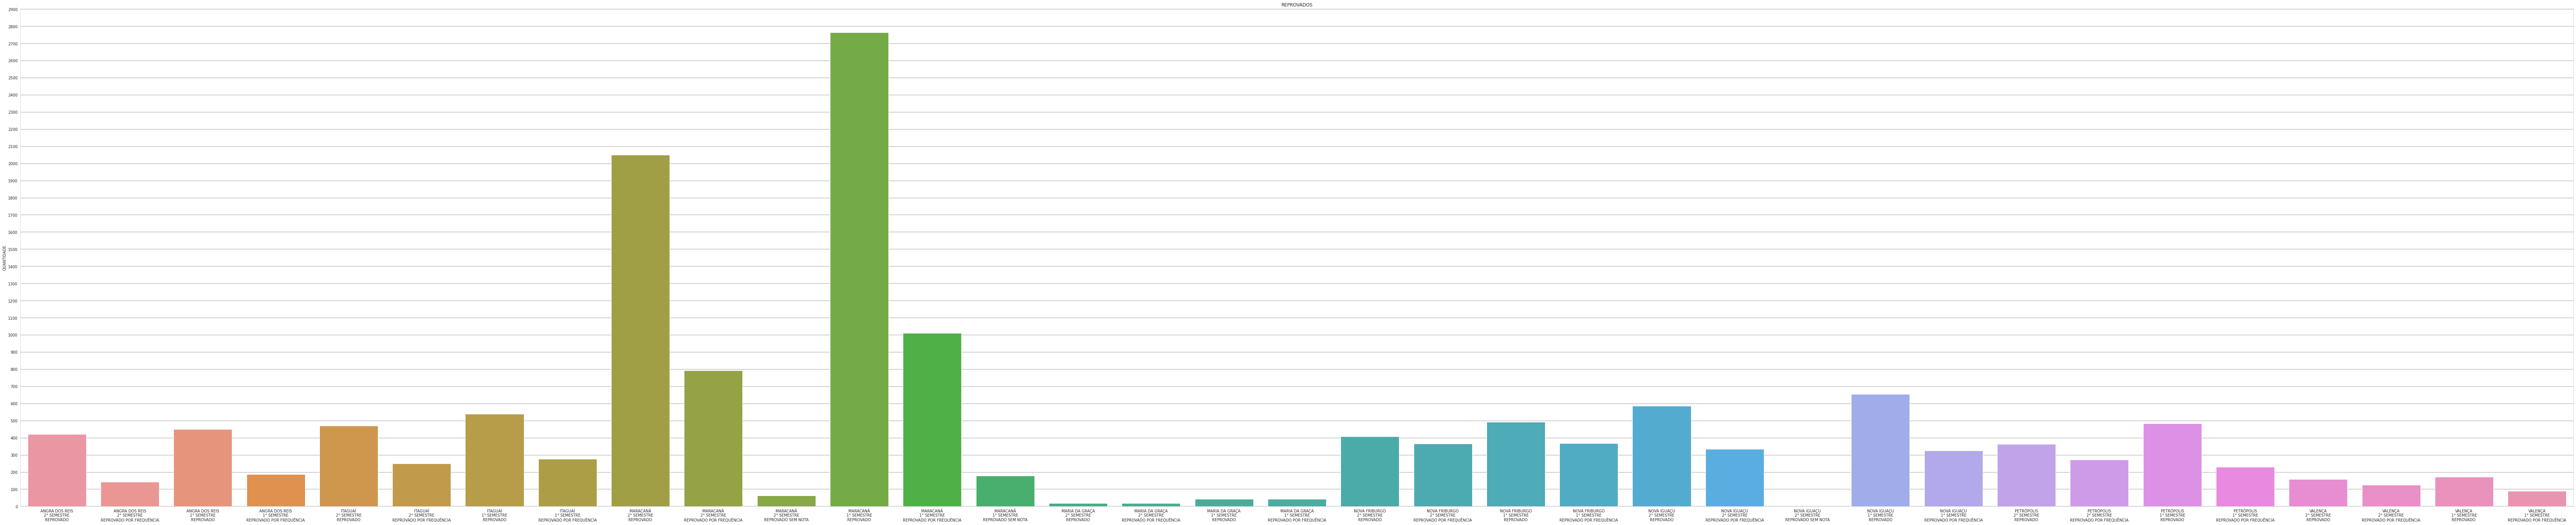

In [58]:
fig = plt.figure(figsize=(120,24))
ax = fig.add_subplot(1, 1, 1)

major_ticks = np.arange(0, 3000, 100)
minor_ticks = np.arange(0, 3000, 50)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

sns.barplot(tabela_geral.CAMPUS + '\n' + tabela_geral.PERÍODO + '\n' + tabela_geral['SITUAÇÃO FINAL'], tabela_geral.QUANTIDADE)

plt.title('REPROVADOS')
plt.grid(True,axis='y',linewidth=2)

Agora só falta classificar por cursos. Vamos ver novamente como está nossa tabela.

In [22]:
tabela_curso_corrigida.head()

,CAMPUS,PERÍODO,COD_CURSO,NOME_CURSO,COD_DISCIPLINA,NOME_DISCIPLINA,REP,RF,RSN
0,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1102,ÁLGEBRA LINEAR I,11,9.0,0.0
1,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1209,ÁLGEBRA LINEAR II,6,4.0,0.0
2,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1101,CÁLCULO DIFERENCIAL E INTEGRAL I,14,9.0,0.0
3,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1201,CÁLCULO DIFERENCIAL E INTEGRAL II,4,3.0,0.0
4,ANGRA DOS REIS,2018/2,GMECAR,CURSO DE ENGENHARIA MECÂNICA,GEXTAR1303,CÁLCULO NUMÉRICO,4,0.0,0.0


In [38]:
tabela_disc_rep = tabela_curso_corrigida.groupby('NOME_DISCIPLINA').REP.agg(sum).sort_values(ascending=False)
print(tabela_disc_rep.head())

tabela_curso_rep = tabela_curso_corrigida.groupby('NOME_CURSO').REP.agg(sum).sort_values(ascending=False)
print(tabela_curso_rep.head())

tabela_campus_rep = tabela_curso_corrigida.groupby('CAMPUS').REP.agg(sum).sort_values(ascending=False)
print(tabela_campus_rep.head())

NOME_DISCIPLINA
ÁLGEBRA LINEAR I          345
CÁLCULO A UMA VARIÁVEL    306
QUÍMICA                   249
CÁLCULO I                 209
ÁLGEBRA LINEAR II         194
Name: REP, dtype: int64
NOME_CURSO
CURSO DE ENGENHARIA MECÂNICA       2086
CURSO DE ENGENHARIA DE PRODUÇÃO    1370
CURSO DE ENGENHARIA ELÉTRICA        742
CURSO DE ENGENHARIA CIVIL           703
CURSO DE CIÊNCIA DA COMPUTAÇÃO      499
Name: REP, dtype: int64
CAMPUS
MARACANÃ          4808
NOVA IGUAÇU       1230
ITAGUAÍ           1010
NOVA FRIBURGO      901
ANGRA DOS REIS     874
Name: REP, dtype: int64


Podemos ver claramente agora quais disciplinas, cursos e campus que reprovam mais.

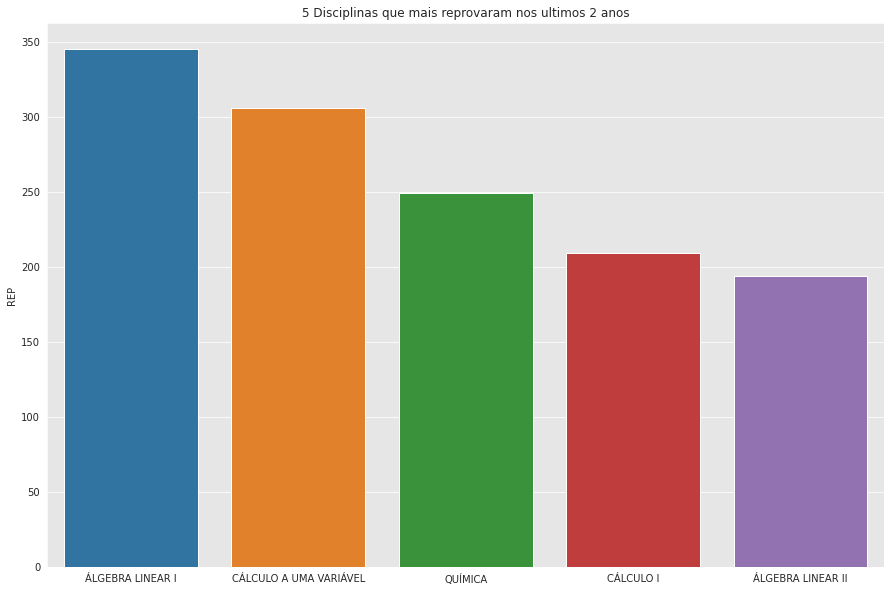

In [48]:
plt.figure(figsize=(15,10))
plt.title('5 Disciplinas que mais reprovaram nos ultimos 2 anos')
sns.barplot(tabela_disc_rep.index.to_list()[:5], tabela_disc_rep[:5])

Podemos colocar mais cursos, porém isso irá saturar o gráfico como o anterior.

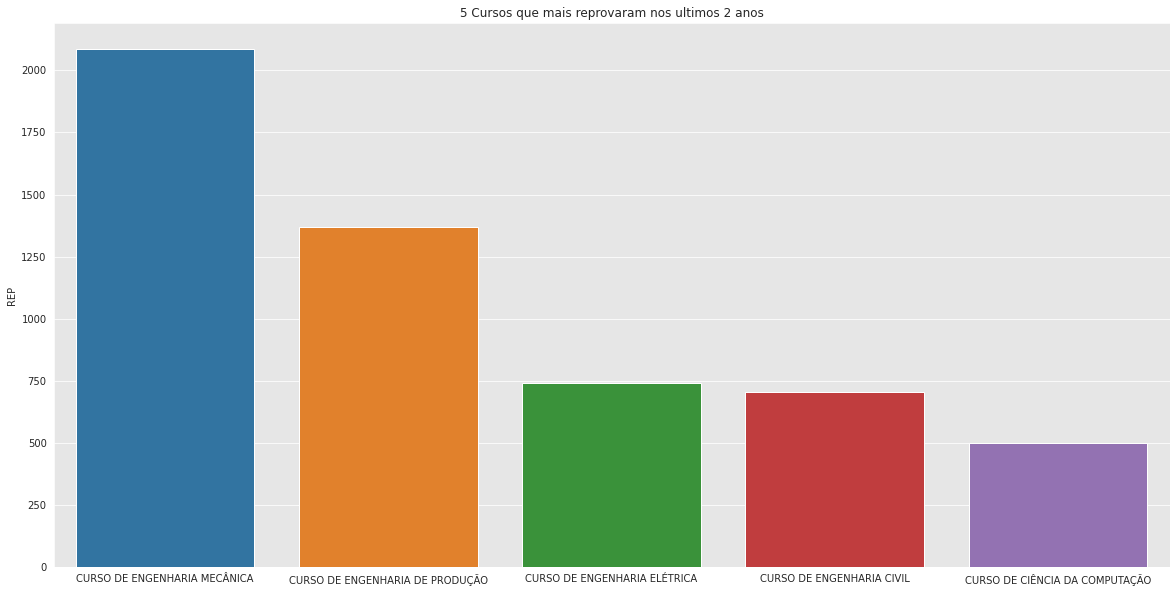

In [50]:
plt.figure(figsize=(20,10))
plt.title('5 Cursos que mais reprovaram nos ultimos 2 anos')
sns.barplot(tabela_curso_rep.index.to_list()[:5], tabela_curso_rep[:5])

Agora também podemos conferir quais cursos que mais reprovam.

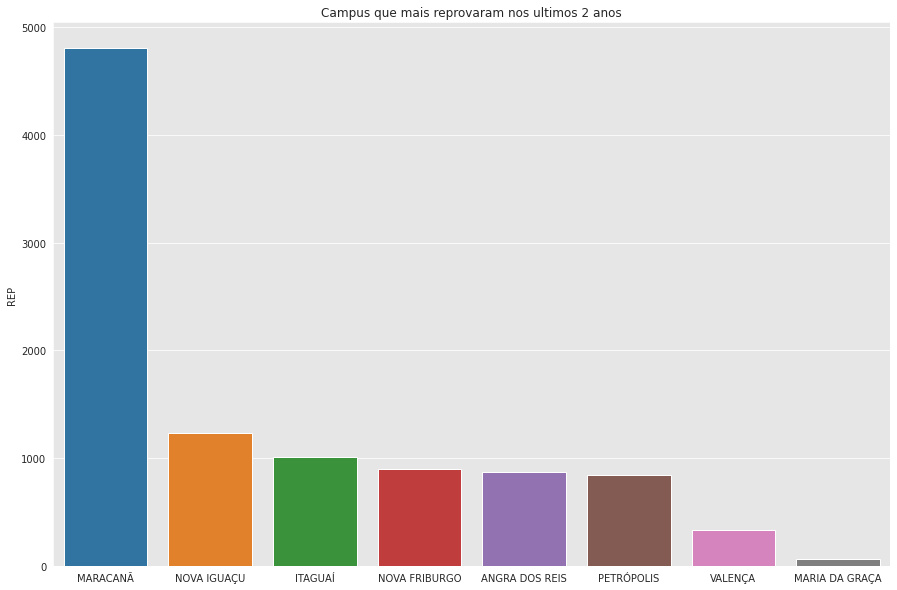

In [59]:
plt.figure(figsize=(15,10))
plt.title('Campus que mais reprovaram nos ultimos 2 anos')
sns.barplot(tabela_campus_rep.index.to_list(), tabela_campus_rep)

Vale lembrar que esses gráficos são dos reprovados por nota, ainda faltam os reprovados sem nota e reprovados por frequência.